In [15]:
import mitdeeplearning.lab1 as mit
import os
from IPython import display as ipythondisplay
import numpy as np
from tensorflow import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import regex as re
import music21
import pickle
from random import randrange
from tqdm.notebook import tqdm_notebook

In [6]:
path= 'nottingham-dataset/ABC_original/'

In [7]:
files = os.listdir(path)
files

['morris.abc',
 'slip.abc',
 'playford.abc',
 'reelsa-c.abc',
 'ashover.abc',
 'reelsm-q.abc',
 'waltzes.abc',
 'xmas.abc',
 'reelsu-z.abc',
 'jigs.abc',
 'reelsh-l.abc',
 'reelsr-t.abc',
 'hpps.abc',
 'reelsd-g.abc']

In [8]:
def gerarDataset(path, files):
    songs = []
    
    for f in tqdm_notebook(files):
        with open(path+f,'r') as abc:
            cont = abc.read()
            musics = cont.split('\n\n')
        for m in tqdm_notebook(musics):
            songs.append(m)
    
    return songs

In [9]:
songs = gerarDataset(path, files)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/348 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

In [10]:
print(songs[10])


X: 10
T:Bonny Green Garters
% Nottingham Music Database
P:BAAABCBC
S:Traditional Morris Farewell
M:6/8
K:D
P:A
A|"D"dcd AFA|"G"BcB "A7"A2(3A/2B/2c/2|"D"dcd "A/c+"efg|"Bm"fdf "A7"ecA|
"D"dcd AFA|"G"BcB "A7"A2(3A/2B/2c/2|"D"dcd "A7"efg|"D"f3 d2:|
K:G
P:B
d|"G"dcB "D7/a"AGF|"G/b"GAB "C"cde|"G"ded dcB|"A7"B3 "D7"A2d|
"G"dcB "D7/a"AGF|"G/b"GAB "C"cde|"G"ded dcB|"D7"A3 "G"G2:|
P:C
d|"G"dcB "D/f+"AGF|"Em"G3 "D7"A3|"G"dcB "D/f+"AGF|"Em"G3 "D7"A3|
"G"dcB "D7/a"AGF|"G/b"GAB "C"cde|"G"ded dcB|"D7"A3 "G"G2:|


In [16]:
def read_audio(audio, name):
    mit.save_song_to_abc(audio, name)
    
    abc = music21.converter.parse(name+'.abc')
    
    abc.write('midi', fp=name+'.midi')
    
    midi = music21.converter.parse(name+'.midi')
    
    midi.show('midi')

In [18]:
read_audio(songs[13],'song_10')

In [62]:
def removerHeader(song):
    abc = song.split('\n')
    
    abc2 = abc[9:] #remover as 6 linhas do header
    
    abc3 = '\n'.join(abc2)
    
    return abc3

In [65]:
s = removerHeader(songs[22])
print(s)

P:A
e/2d/2|"Am"cB/2c/2 Ae/2^f/2|"Am"e/2d/2c/2B/2 A/2c/2e|"D"^fd df/2g/2|\
"Am"e/2d/2c/2B/2 cB/2A/2|
"G"Bg BG|"Am"A/2B/2A/2G/2 Ee/2d/2|"Am"c/2B/2A/2c/2 "Em"B/2A/2G/2B/2|"Am"A2 A:|
P:B
"Am"ea a/2g/2a/2b/2|"Am"a/2g/2e/2^f/2 "G"gd|"Am"e/2g/2^f/2a/2 g/2f/2e|\
"G"d/2c/2B/2A/2 GA/2B/2|
"Am"cc "D"dd|e/2^f/2g/2e/2 a/2b/2a/2g/2|"D"^fA fg/2f/2|"Am"eA "D"de/2d/2|
"Am"cB/2c/2 "Em"A/2B/2c/2d/2|"Am"eA Ae/2d/2|"Am"c/2B/2A/2c/2 "Em"B/2A/2G/2B/2|\
"Am"A2 A||


In [66]:
def run(musics,array):  
    for music  in tqdm_notebook(musics):
        newMusic = removerHeader(music)
        array.append(newMusic)

In [67]:
songs_processed = []

In [68]:
run(songs, songs_processed)

  0%|          | 0/1065 [00:00<?, ?it/s]

In [69]:
songs_joined = "\n\n".join(songs_processed) 
def build_vocab(songs):
    vocab = sorted(set(songs_joined))
    return vocab

In [70]:
print(len(songs_joined))

300618


In [71]:
vocab = build_vocab(songs_processed)

In [72]:
print(vocab)

['\n', ' ', '!', '"', '#', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '<', '=', '>', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'O', 'P', 'Q', 'S', 'T', 'U', 'V', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [73]:
def build_dictionary(vocab):
    idx2char = []
    for c in vocab :
        if c not in idx2char : idx2char.append(c)
    char2idx = {w: i for i, w in enumerate(idx2char)} 
    return idx2char, char2idx

In [74]:
idx2char, char2idx = build_dictionary(vocab)

In [75]:
pickle.dump(idx2char, open('idx2char2.pickle','wb'))
pickle.dump(char2idx, open('char2idx2.pickle','wb'))

In [76]:
def vectorize_string(songs_joined):
    vectorized = [char2idx[c] for c in songs_joined] 
    vectorized = np.array(vectorized, dtype='i')     
    return vectorized

In [77]:
vectorized_songs = vectorize_string(songs_joined)

In [78]:
def get_batch(vectorized_songs, seq_length, batch_size):
    
    # captura o tamanho do dataset vetorizado: 200679
    n = vectorized_songs.shape[0] - 1

    # escolhe aleatoriamente os índices iniciais da sentenças
    idx = np.random.choice(n-seq_length, batch_size)

    input_batch = [[vectorized_songs[i:i+seq_length] for i in idx]]
    output_batch = [[vectorized_songs[i+1: i+1+seq_length] for i in idx]]

    x_batch = np.reshape(input_batch, [batch_size, seq_length])
    y_batch = np.reshape(output_batch, [batch_size, seq_length])
        
    return x_batch, y_batch

In [79]:
batch_size = 4000  
seq_length = 65  

x_batch, y_batch = get_batch(vectorized_songs, seq_length=seq_length, batch_size=batch_size)
x_train, y_train = x_batch[:3600], y_batch[:3600]
x_valid, y_valid = x_batch[3600:-1], y_batch[3600:-1]

In [80]:
print(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape)

(3600, 65) (3600, 65) (399, 65) (399, 65)


In [84]:
def create_model(vocab_size, embedding_dim, rnn_units):
    # definindo a arquitetura do modelo    
    model = keras.models.Sequential([
        keras.layers.Embedding(vocab_size, embedding_dim), 
        keras.layers.LSTM(rnn_units, recurrent_initializer='glorot_uniform', recurrent_activation='sigmoid', return_sequences=True),
        keras.layers.Dense(units=vocab_size,activation='softmax'),
        keras.layers.Dropout(0.3)
    ])

    return model

In [85]:
def train_model(model, x_train, y_train, x_valid, y_valid):
        
    # Compilando e treinando o modelo
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),metrics=['accuracy']
    )
    
    checkpoint_filepath = './lstm_best_model_v3'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True)
    
    history = model.fit(x_train, y_train, epochs=25, validation_data=(x_valid, y_valid), callbacks=[model_checkpoint_callback])
    
    return model, history

In [87]:
vocab_size = len(vocab)
embedding_dim = 256 
rnn_units = 1400 
model = create_model(vocab_size, embedding_dim, rnn_units)

In [90]:
vocab_size

81

Epoch 1/25
113/113 [==============================] - 126s 1s/step - loss: 3.6222 - accuracy: 0.5316 - val_loss: 1.6496 - val_accuracy: 0.6852
Epoch 2/25
113/113 [==============================] - 120s 1s/step - loss: 3.5433 - accuracy: 0.5398 - val_loss: 1.7089 - val_accuracy: 0.6862
Epoch 3/25
113/113 [==============================] - 121s 1s/step - loss: 3.5150 - accuracy: 0.5429 - val_loss: 1.7824 - val_accuracy: 0.6903
Epoch 4/25
113/113 [==============================] - 121s 1s/step - loss: 3.4441 - accuracy: 0.5487 - val_loss: 1.7882 - val_accuracy: 0.6921
Epoch 5/25
113/113 [==============================] - 121s 1s/step - loss: 3.3853 - accuracy: 0.5538 - val_loss: 1.8224 - val_accuracy: 0.6953
Epoch 6/25
113/113 [==============================] - 121s 1s/step - loss: 3.3546 - accuracy: 0.5570 - val_loss: 1.8553 - val_accuracy: 0.6971
Epoch 7/25
113/113 [==============================] - 120s 1s/step - loss: 3.2933 - accuracy: 0.5619 - val_loss: 1.8614 - val_accuracy: 0.6999

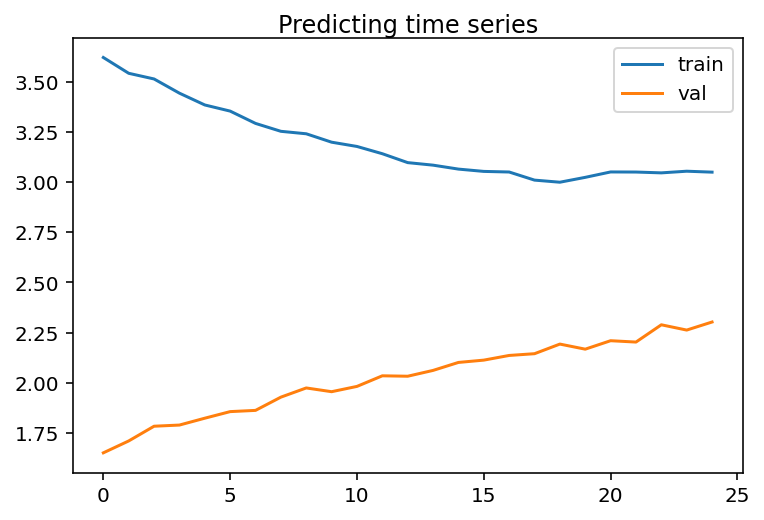

In [89]:
model, history = train_model(model, x_train,y_train,x_valid,y_valid)

# plotando as curvas de aprendizado
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Predicting time series', pad=-80)
plt.legend()
plt.show()